In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def plot_vectors(X, features=None):
    """
    Params:
        X -> 2D tensor where each row is a data sample and each column denotes distinct features of the data
        features -> a list with 3 elements denoting the name of three features, does not support more than 3 features
    Reruens:
        plots the 3d graph
        return None
    """
    if (features!=None):
        if (type(features)==list):
            if (len(features)!=3 and X.shape[1]!=3):
                raise ValueError('Only dataset with 3 features are allowed, but found {}'.format(X.shape[1]))
            else:
                features = [str(elem) for elem in features]
        else:
            raise ValueError('a list data type with feature names are expected, but found {}'.format(type(features)))
    else:
        features = ['X', 'Y', 'Z']
    min_values, _ = torch.min(X, dim=0)
    max_values, _ = torch.max(X, dim=0)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.rcParams["figure.dpi"] = 100
    origin = torch.tensor([0, 0, 0], dtype=torch.float32)
    for x in X:
        ax.quiver(*origin, *x, color='magenta', arrow_length_ratio=0.1)
    ax.set_xlim([min_values[0].item(), max_values[0].item()])
    ax.set_ylim([min_values[1].item(), max_values[1].item()])
    ax.set_zlim([min_values[2].item(), max_values[2].item()])
    ax.tick_params(axis='x', which='both', length=30, pad = -5)
    ax.tick_params(axis='y', which='both', length=30, pad = -5)
    ax.tick_params(axis='z', which='both', length=0, pad = -2)
    ax.set_xlabel(features[0], labelpad=-9, weight='bold')
    ax.set_ylabel(features[1], labelpad=-9, weight='bold')
    ax.set_zlabel(features[2], rotation=90, labelpad=-7, weight='bold')
    ax.set_title('Visualizing Feature Vectors')
    ax.view_init(elev=20, azim=45, roll=0)
    plt.grid('off')
    plt.show()

    return None

## Creating dataset
Let's create a small dataset ( $X$ ) with three features, where each feature describes a confidence score of a person for investing in the companies: Apple, Google and Meta respectively. The dataset is a 2D matrix (generally called tensor in n-D space where n is any nonnegative integer) where each row defines a new person and each column signifies the confidence of investing in a particular company, e.g., the number in 2nd row and 3rd column depicts the confidence of the 2nd person's confidence in investing into Meta. In this example there are 8 persons (rows) and 3 companies/features (columns). In this assignment, we will refer to the number of data points / number of persons as $N$ ( here $N=8$ ) and number of features as $N$ ( here $M=3$ ). Moreover, we define the investment confidence scores in this assignment $X_{i,j} \in (-\infty, +\infty)$ where $i \in \{1,2,..,N\}$ and $j \in \{1,2,..,M\}$.

In [3]:
X = torch.tensor([[ 4, 3, 0],
                  [-6, 1, 9],
                  [ 2, 0,-8],
                  [-3, 5, 7],
                  [ 0, 4, 8],
                  [ 1, 9, 3],
                  [ 7,-7, 0],
                  [ 2, 8, 5]], dtype=torch.float32)

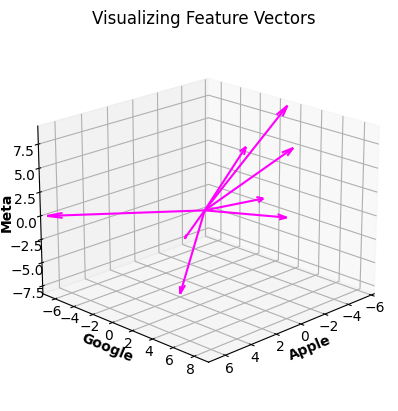

In [4]:
plot_vectors(X, ['Apple', 'Google', 'Meta'])

## <span style="color:orange;">Part A: Compute a covariance matrix of the 3 features in the dataset created above using ''open form'' covariance formula.</span> <span style="color:blue;">Complete this task for 5 marks.</span>

A covariance matrix ( denoted as $C$ ) computed from a dataset with M features is a $M \times M$ matrix. Each cell of a covariance matrix signifies "similarity" between $i^{th}$ and $j^{th}$ feature. Moreover, covariance matrix is symmetric meaning it is identical to its' transpose transformation ( $C^T=C$ ) which also means Cov($f_1,f_3$) = Cov($f_3,f_1$). Now, the formulae for copmuting covariance between two features $f_p$ and $f_q$ is the following: Cov($f_p,f_q$) = $\mathbb{E}(f_p f_q) - \mathbb{E}(f_p) \mathbb{E}(f_q)$. Here, $\mathbb{E}$ is known as expectation function which translates to arithmatic mean in our case. 

\begin{array}{|c|c|c|}
\hline
\text{Cov ($f_1,f_1$)} & \text{Cov ($f_1,f_2$)} & \text{Cov ($f_1,f_3$)} \\
\hline
\text{Cov ($f_2,f_1$)} & \text{Cov ($f_2,f_2$)} & \text{Cov ($f_2,f_3$)} \\
\hline
\text{Cov ($f_3,f_1$)} & \text{Cov ($f_3,f_2$)} & \text{Cov ($f_3,f_3$)} \\
\hline
\end{array}

<span style="color:green;">Instructions:</span> You will create a pytorch tensor named C where you will store the copmuted covariance scores among different combinations of features. You will print C and use code cells below this markdown cell for Part A.

<span style="color:green;">Hints:</span> While computing $\mathbb{E}(f_p f_q)$, you need to first perform element wise product among vector $f_p$ and $f_q$, i.e., here $f_p \in \mathbb{R}^N$ and $f_q \in \mathbb{R}^N$ $\therefore f_p f_q \in \mathbb{R}^N$. To get feature vectors from the 2D matrix use slicing or indexing in pytorch. Then compute the mean of vector $f_p f_q$ which is a scalar $\therefore \mathbb{E}(f_p f_q) \in \mathbb{R}$. Then, you need to compute a scalar mean for $\mathbb{E}(f_p)$ and $\mathbb{E}(f_q)$ as well. Now, while computing mean for covariance you do not divide the summation of $N$ points by the $N$, instead you divide by $(N-1)$ in order to exclude the data point at the index i.e., $\mathbb{E}(f_q) = \frac{1}{N-1} \sum_{i=1}^{N} f_q^i$ and $\mathbb{E}(f_q) \neq \frac{1}{N} \sum_{i=1}^{N} f_q^i$.

<span style="color:green;">Restrictions:</span> There are $3 \times 3 = 9$ cells. To goto each cell you may use for loops and then compute Cov($f_p,f_q$) where $p \in \{1,2,3\}, q \in \{1,2,3\}$ (since $N=3$). However, while computing each Cov($f_p,f_q$), you <span style="color:red;">cannot</span> use for loops to compute mean and element wise multiplication as stated in the above procedures. You are <span style="color:red;">allowed to only use pytorch</span> and no other libraries such as numpy.

<span style="color:green;">Related Tutorials:</span>
   1. http://csgrad.science.uoit.ca/courses/csci5550g-f18/code/pytorch/lesson-1/pytorch-basics.html
   2. https://www.youtube.com/watch?v=152tSYtiQbw
   3. https://www.cuemath.com/algebra/covariance-matrix/


In [5]:
########################################################
#####                                              #####
#####        Write your code here for Part A       #####
#####     You may use any number of additional     #####
#####   code cells above instructions for Part B   #####
#####                                              #####
########################################################









## <span style="color:orange;">Part B: Compute a covariance matrix of the 3 features in the dataset created above using ''closed form'' covariance formula.</span> <span style="color:blue;">Complete this task for 5 marks.</span>

Under the same setting in Part A, we can extend the covariance formulae to compute each index of the covariance matrix to a closed form that generalizes to the entire covariance matrix. The gain from the so called ''closed form'' is a generic formula that can be used to compute the entire covariance matrix at one fly which later on in this course you will see as a blessing as it allows to perform derivative on the entire matrix.

$ C = \frac{1}{N-1} \sum_{i=1}^{N} (X_i - \mathbb{E}(X)) (X_i - \mathbb{E}(X))^T \approx \frac{1}{N-1} (X^T X - {\bar{X}}^T \bar{X})$

<span style="color:green;">Instructions:</span> You will create a pytorch tensor named C where you will store the copmuted covariance scores among different combinations of features. You will print C and use code cells below this markdown cell for Part B.

<span style="color:green;">Hints:</span> Firstly compute $X^T X \in \mathbb{R}^{M \times M}$. Then compute $\bar{X} = \mathbb{E}(X) \in \mathbb{R}^M$, again divide by $(N-1)$ not $N$ and then secondly, compute ${\bar{X}}^T \bar{X} \in \mathbb{R}^{M \times M}$. For inspiration check the <span style="color:purple;">copmute_covariance</span> function in this [pytorch implementation](https://github.com/DenisDsh/PyTorch-Deep-CORAL/blob/master/coral.py) where the tensor "input_data" at line 18 follwos similar assumption and shape to X in this assignment. Visualize a small example by handdrawing for better ubderstanding.

<span style="color:green;">Restrictions:</span> You are <span style="color:red;">allowed to only use pytorch</span> and no other libraries such as numpy and <span style="color:red;">cannot</span> use any for loops whatsoever and <span style="color:red;">cannot</span> use [torch.cov](https://pytorch.org/docs/stable/generated/torch.cov.html).

<span style="color:green;">Related Tutorials:</span>
   1. https://en.wikipedia.org/wiki/Covariance_matrix
   2. https://www.youtube.com/watch?v=F-aku75OpoM

In [6]:
########################################################
#####                                              #####
#####        Write your code here for Part B       #####
#####     You may use any number of additional     #####
#####   code cells above instructions for Part C   #####
#####                                              #####
########################################################









## <span style="color:orange;">Part C: Computing element-wise derivative of a matrix with respect to another matrix.</span> <span style="color:blue;">Complete this task for 5 marks.</span>

Create a matrix $X \in \mathbb{R}^{2 \times 7}$ with 7 features for 2 data points and then compute $Y = ln(X^2 + 5) - cos(\frac{X}{\sqrt{3}})$ where $X_{ij} \in [0,\infty)$. Your final goal is to compute $\frac{\delta Y}{\delta X}$

<span style="color:green;">Instructions:</span> You will print a tensor of the same shape as $X$ containing $\frac{\delta Y}{\delta X}$ values at corresponding cells. Use code cells below this markdown cell for Part C.

<span style="color:green;">Hints:</span> for element wise $\frac{\delta y}{\delta y}$ you need y.backward(torch.ones_like(x))

<span style="color:green;">Restrictions:</span> You are <span style="color:red;">allowed to only use pytorch</span> and no other libraries such as numpy and <span style="color:red;">cannot</span> use any for loops whatsoever.

<span style="color:green;">Related Tutorials:</span>
   1. https://dev.to/tbhaxor/pytorch-performing-derivatives-on-tensors-3hi5
   2. https://stackoverflow.com/questions/56799616/how-torch-tensor-backward-works
   3. https://majianglin2003.medium.com/pytorch-gradients-8ed224a6b54d

In [7]:
########################################################
#####                                              #####
#####        Write your code here for Part C       #####
#####     You may use any number of additional     #####
#####                 code cells                   #####
#####                                              #####
########################################################









## <span style="color:orange;">Part D: Computing L2 norm.</span> <span style="color:blue;">Complete this task for 5 marks.</span>

Create a matrix $X \in \mathbb{R}^{2 \times 7}$ with 7 features for 2 data points and then compute where $X_{ij} \in (-\infty,+\infty)$. Your final goal is to compute $L_2$ norm of $X$

<span style="color:green;">Instructions:</span> You are asked to (i) compute $L_2$ norm of $X \in \mathbf{R}^7$ for each data point and (ii) compute $L_2$ norm of $X \in \mathbf{R}^2$ for each feature$. Use code cells below this markdown cell for Part D.

<span style="color:green;">Restrictions:</span> You are <span style="color:red;">allowed to only use pytorch</span> and no other libraries such as numpy and <span style="color:red;">cannot</span> use any for loops whatsoever. Most importantly, you <span style="color:red;">cannot</span> use [torch.norm](https://pytorch.org/docs/stable/generated/torch.norm.html)

<span style="color:green;">Related Tutorials:</span>
   1. https://dev.to/tbhaxor/pytorch-performing-derivatives-on-tensors-3hi5
   2. https://stackoverflow.com/questions/56799616/how-torch-tensor-backward-works
   3. https://majianglin2003.medium.com/pytorch-gradients-8ed224a6b54d

In [8]:
########################################################
#####                                              #####
#####    Write your code here for Part D(i,ii)     #####
#####    You may use any number of additional      #####
#####                 code cells                   #####
#####                                              #####
########################################################









## <span style="color:orange;">Part E: Computing KL divergence.</span> <span style="color:blue;">Complete this task for 5 marks.</span>

Create a matrix $A \in \mathbb{R}^{2 \times 4}$ with 2 data points and 4 features, the features here is a probability distribution, therefore the 4 numbers in each row sum to 1 and $\in [0,1]$. Now create another matrix $B \in \mathbb{R}^{2 \times 4}$ with another 2 data points and 4 features, the features here again is a probability distribution, therefore the 4 numbers in each row sum to 1 and $\in [0,1]$. Our goal here is to compute KL divergence to measure "similarity" between these two distributions.
i.e., A = [ [0.40, 0.40, 0.15, 0.05], [0.25, 0.35, 0.15, 0.25] ] and B = [ [0.35, 0.40, 0.20, 0.25], [0.35, 0.25, 0.30, 0.10] ], feel free to create your own.

<span style="color:green;">Instructions:</span> You are asked to compute a vector (or tensor in general terms) called K with 2 elements ( $\in \mathbb{R}^2$ ). The first element is the KL-divergence score betwen the first distribution of A and B and the second element is the KL-divergence score betwen the second distribution of A and B. Use code cells below this markdown cell for Part E.

<span style="color:green;">Hint:</span> Do not forget to take $ln(.)$ while calculating KL-divergence.

<span style="color:green;">Restrictions:</span> You are <span style="color:red;">allowed to only use pytorch</span> and no other libraries such as numpy and <span style="color:red;">cannot</span> use any for loops whatsoever. Most importantly, you <span style="color:red;">cannot</span> use [torch.nn.KLDivLoss](https://pytorch.org/docs/stable/generated/torch.nn.KLDivLoss.html.html)

<span style="color:green;">Related Tutorials:</span>
   1. https://machinelearningmastery.com/divergence-between-probability-distributions/
   2. https://www.youtube.com/watch?v=SxGYPqCgJWM
   3. https://www.youtube.com/watch?v=q0AkK8aYbLY

In [9]:
########################################################
#####                                              #####
#####       Write your code here for Part E        #####
#####    You may use any number of additional      #####
#####                 code cells                   #####
#####                                              #####
########################################################







